In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [2]:
import sys
print(sys.executable)



C:\Users\Admin\anaconda3\envs\ml-dl-nlp\python.exe


In [3]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
plt.rc('font', family = 'Hancom Gothic')

In [4]:
df_total = pd.read_csv(r"C:\Ai_x\lecNote\FlowCast\Data_Analysis\서울시_시간별_PM_배치_2021_2025.csv", parse_dates=['일시'])
df_total = df_total[df_total['일시']<'2025']
df_total.columns = ['일시','행정구','대여량']

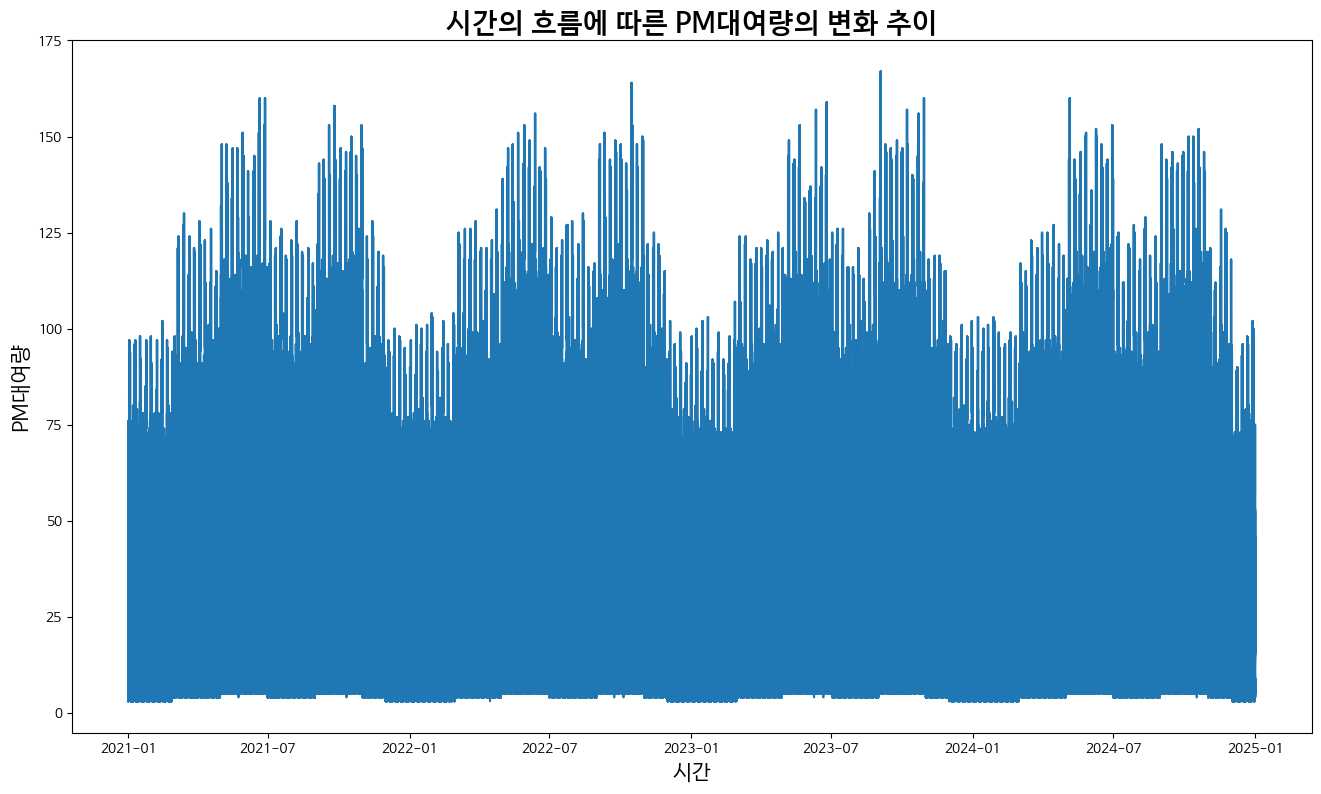

In [5]:
plt.figure(figsize=(16,9))
plt.plot(df_total['일시'], df_total['대여량'])
# plt.axvline(x=pd.to_datetime('2021-07-01'), color='black')
# plt.axvline(x=pd.to_datetime('2022-07-01'), color='black')
# plt.axvline(x=pd.to_datetime('2023-07-01'), color='black')
# plt.axvline(x=pd.to_datetime('2024-07-01'), color='black')
plt.xlabel('시간', size=15)
plt.ylabel('PM대여량', size=15)
plt.title('시간의 흐름에 따른 PM대여량의 변화 추이', size=20, fontweight='bold')
plt.show()

<font size=5>위 그림으로 보아 자전거는 월의 변화에 따른 트랜드가 발생하며 이는 기상, 계절과 연관성이 깊으므로 모델 설계의 feature로 사용</font>
- 한국의 경우, 계절별 기온, 풍속, 습도, 강수의 차이가 발생하므로 일시 데이터와 기상 데이터를 사용하여 계절성 고려 모델 생성

In [8]:
!pip install statsmodels


In [12]:
import sys
print(sys.executable)
import sys
!"{sys.executable}" -m pip install --upgrade statsmodels


C:\Users\Admin\anaconda3\envs\ml-dl-nlp\python.exe
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.6 MB 11.8 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.6 MB 11.7 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.6 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 11.3 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   ----

In [13]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_total['대여량'],
                           model = 'additive',
                           period=90, 
                           )

C:\Users\Admin\AppData\Local\Temp\ipykernel_13984\253488355.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


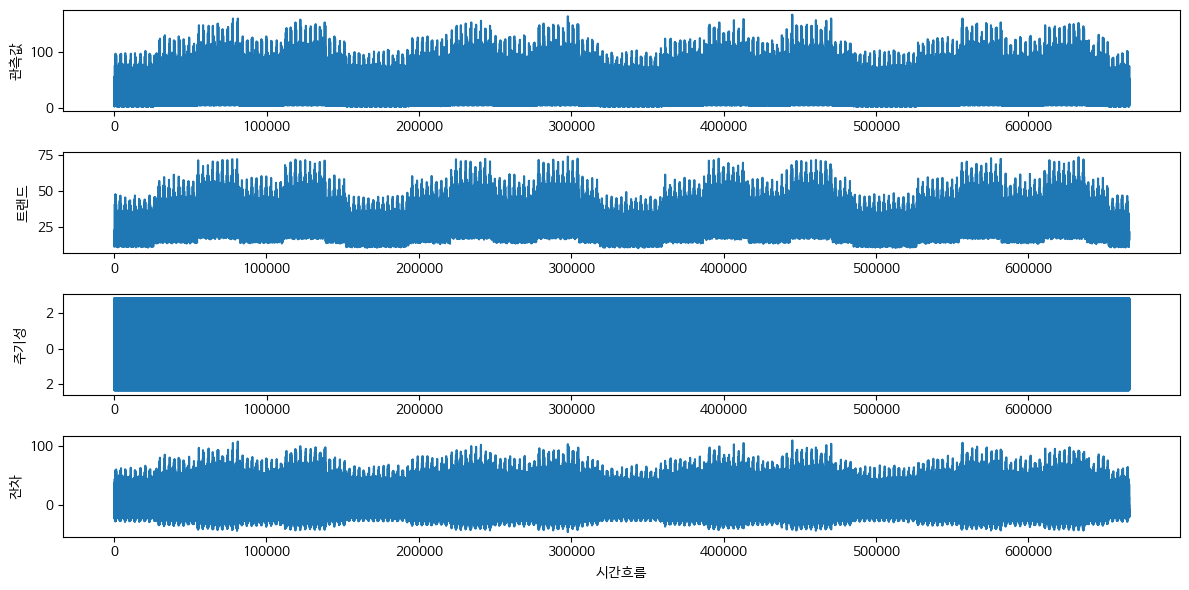

In [14]:
# 그래프로 체크
fig, axes = plt.subplots(4,1, figsize = (12,6))
axes[0].plot(result.observed)
axes[0].set_ylabel('관측값')
axes[1].plot(result.trend)
axes[1].set_ylabel('트랜드')
axes[2].plot(result.seasonal)
axes[2].set_ylabel('주기성')
axes[3].plot(result.resid)
axes[3].set_ylabel('잔차')
plt.xlabel('시간흐름')
plt.tight_layout()
plt.show()


In [15]:
# Prophet을 사용해서 예측하기

In [18]:
# 1) '일시'와 '대여량' 컬럼만 선택해 복사본 생성
df_prophet = df_total[['일시', '대여량']].copy()

# 2) Prophet이 요구하는 컬럼명으로 변경
df_prophet.columns = ['ds', 'y']

# 3) 확인
print(df_prophet.head())

                   ds   y
0 2021-01-01 00:00:00  24
1 2021-01-01 01:00:00  24
2 2021-01-01 02:00:00  24
3 2021-01-01 03:00:00  24
4 2021-01-01 04:00:00  24


In [20]:
%pip install prophet


  Using cached prophet-1.1.7-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.7-py3-none-win_amd64.whl (13.3 MB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 9.2 MB/s eta 0:00:00
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)

   ------------- -------------------------- 2/6 [importlib_resources]
   -------------------- ------------------- 3/6 [holidays]
   -------------------- ------------------- 3/6 [holidays]
   -------------------- ------------------- 3/6 [h

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [22]:
# 1) Prophet용으로 '일시'와 '대여량'만 골라 새 DataFrame 생성
df_total_prophet = df_total[['일시', '대여량']].copy()

# 2) 컬럼명을 Prophet이 요구하는 'ds', 'y'로 변경
df_total_prophet.columns = ['ds', 'y']

# (선택) DS 컬럼이 datetime 타입인지 확인 및 변환
df_total_prophet['ds'] = pd.to_datetime(df_total_prophet['ds'])

# 3) 확인
print(df_total_prophet.head())
print(df_total_prophet.columns)  # ['ds', 'y'] 여야 합니다.

# 4) 모델 학습
from prophet import Prophet
m = Prophet()
m.fit(df_total_prophet)


                   ds   y
0 2021-01-01 00:00:00  24
1 2021-01-01 01:00:00  24
2 2021-01-01 02:00:00  24
3 2021-01-01 03:00:00  24
4 2021-01-01 04:00:00  24
Index(['ds', 'y'], dtype='object')


17:01:05 - cmdstanpy - INFO - Chain [1] start processing
17:01:45 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\prophet\plot.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


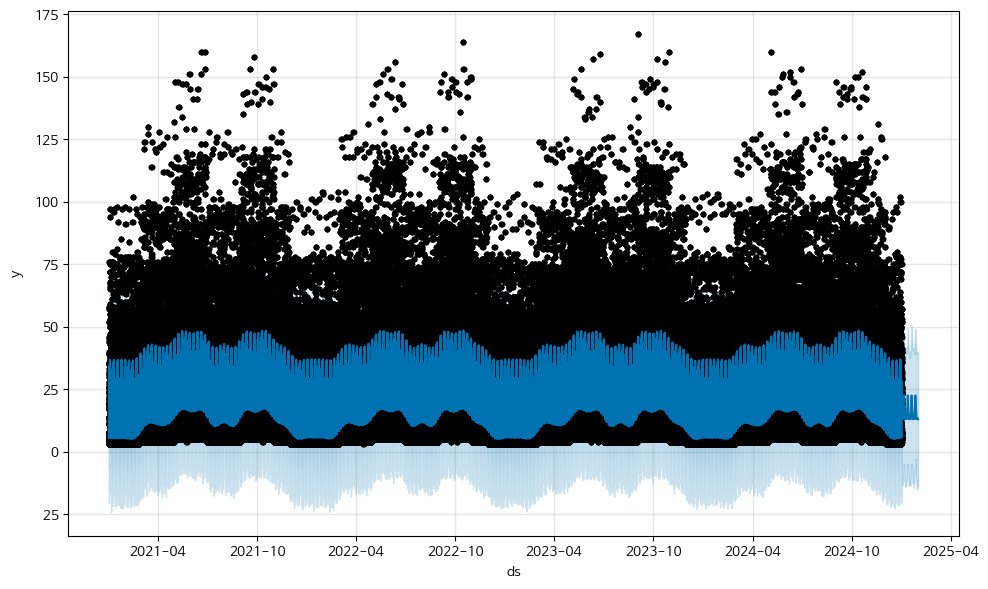

In [23]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)
plt.show()

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\prophet\plot.py:197: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


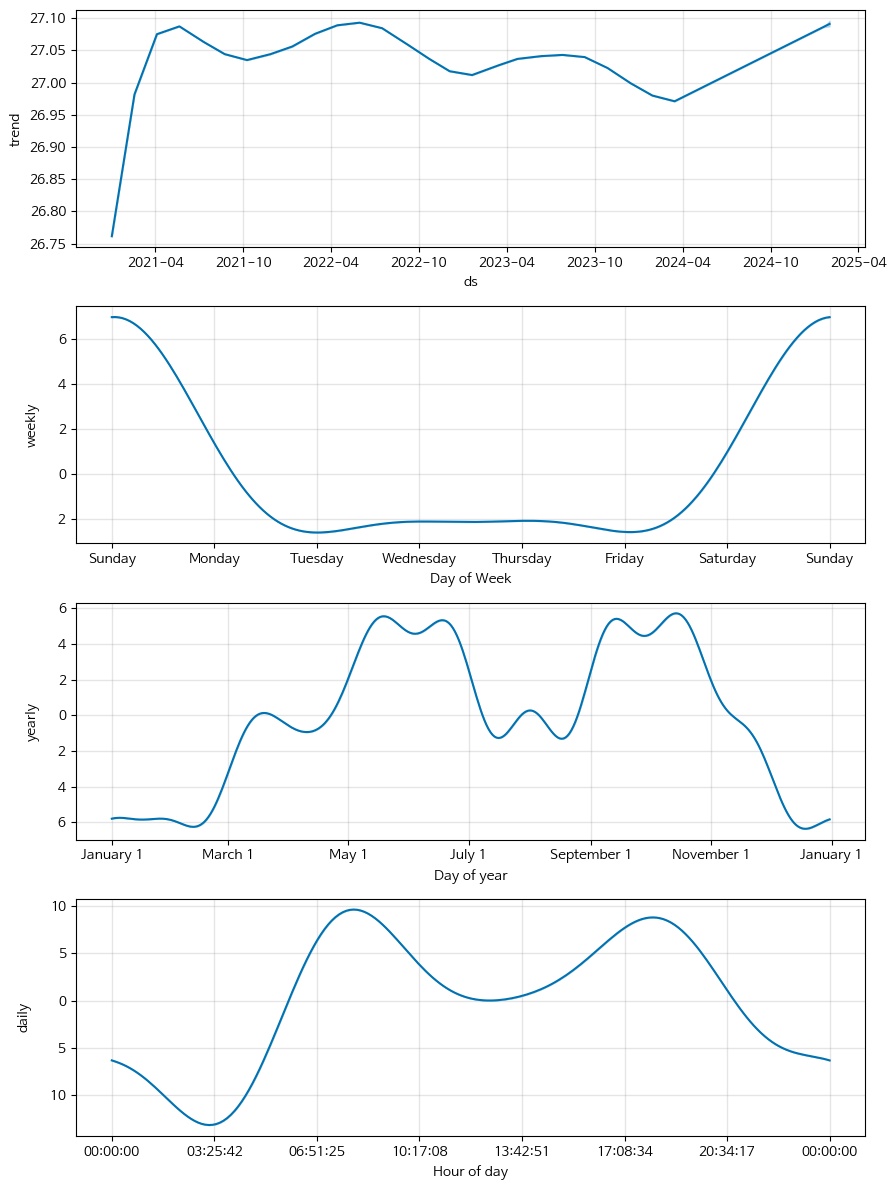

In [24]:
f2 = m.plot_components(forecast) # 트랜드와 휴일효과 그래프